지하철 시간대별 데이터 분석

In [1]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
result = []
total_number = 0

with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)      # 헤더 정보를 2개 건너뜀
    
    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        
print(f"총 지하철 역의 수: {len(result)}")
print(f"새벽 4시 승차인원: {total_number}")

총 지하철 역의 수: 622
새벽 4시 승차인원: 161079


새벽 4시 총 승차 인원수: 161,079
최대 승차역: 구로, 인원수: 13,041


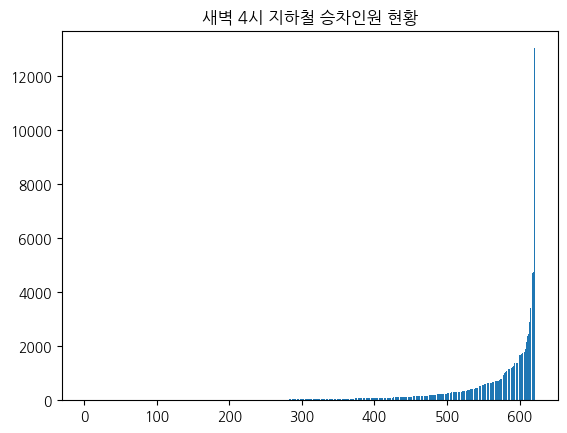

In [3]:
with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    total_number = 0
    max_num = -1
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        if row[4] > max_num:
            max_num = row[4]
            max_station = row[3]
            
print(f"새벽 4시 총 승차 인원수: {total_number:,}")     # {~~:,} ,는 수에서 천단위 구분기호
print(f"최대 승차역: {max_station}, 인원수: {max_num:,}")

result.sort()   # 정렬
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.title("새벽 4시 지하철 승차인원 현황")
plt.show()

In [4]:
import numpy as np

[1]: 신림(2호선) 580,615
[2]: 구로디지털단지(2호선) 419,180
[3]: 잠실(송파구청)(2호선) 408,219
[4]: 서울대입구(관악구청)(2호선) 393,990
[5]: 신도림(2호선) 357,135
[6]: 까치산(5호선) 331,049
[7]: 연신내(3호선) 327,882
[8]: 화곡(5호선) 320,069
[9]: 쌍문(4호선) 317,940
[10]: 수유(강북구청)(4호선) 299,724


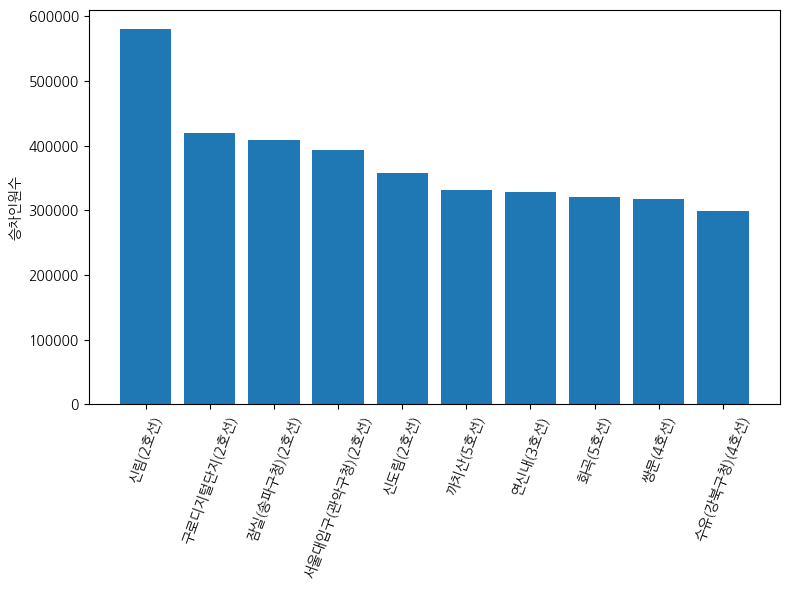

In [6]:
with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    
    station_list = []
    max_num = -1
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        passenger_num = sum(row[10:15:2])
        
        station_name = row[3] + '(' + row[1] + ')'
        station_list.append((station_name, passenger_num))
        
sorted_passenger_list = sorted(station_list, key=lambda x: x[1], reverse=True)
index = 1
for station in sorted_passenger_list[:10]:
    print(f"[{index}]: {station[0]} {station[1]:,}")
    index += 1
    
station_name, station_passenger = zip(*sorted_passenger_list[:10])
# for name, num in sorted_passenger_list[:10]:
#     station_name.append(name)
#     station_passenger.append(num)

plt.figure(figsize=(8, 6))
plt.bar(range(len(station_passenger)), station_passenger)
plt.xticks(range(len(station_passenger)), station_name, rotation=70)
plt.ylabel('승차인원수')
plt.tight_layout()
plt.show()

최대 승차 인원역: 신림(2호선) 580,615


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

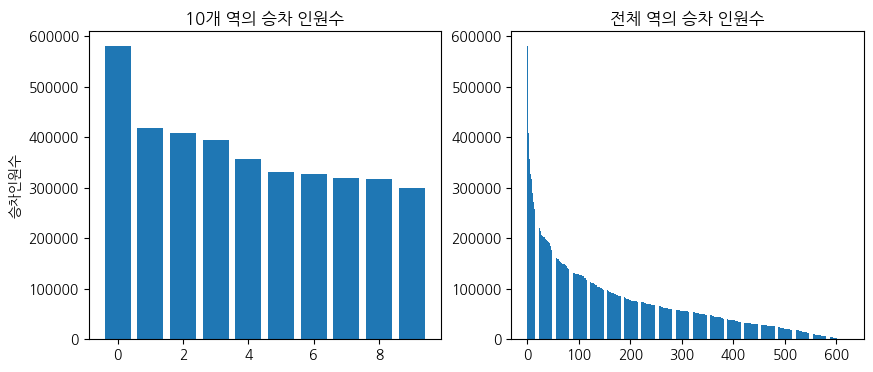

In [18]:
# 출근 시간대 지하철 이용 현황

with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    
    result = []
    max_num = -1
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])
        result.append(row_sum)
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] +'(' + row[1] + ')'
            
print(f"최대 승차 인원역: {max_station} {max_num:,}")
result.sort(reverse=True)

plt.figure(figsize=(10,4))
ax1 = plt.subplot(1, 2, 1)
plt.title("10개 역의 승차 인원수", size=12)
plt.bar(range(10), result[0:10])
plt.ylabel('승차인원수')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.title('전체 역의 승차 인원수', size=12)
plt.bar(range(len(result)), result)

plt.subtitle('출근시간대 승차 인원 현황\n', size=20)
plt.tight_layout()
plt.show()

[4시구로]: 13041
[5시부천]: 40934
[6시신림]: 67569
[7시신림]: 172920
[8시신림]: 250103
[9시신림]: 157592
[10시신림]: 91388
[11시잠실(송파구청)]: 87311
[12시잠실(송파구청)]: 97515
[13시잠실(송파구청)]: 107172
[14시잠실(송파구청)]: 116532
[15시잠실(송파구청)]: 140539
[16시잠실(송파구청)]: 166757
[17시강남]: 239429
[18시강남]: 298631
[19시강남]: 197594
[20시홍대입구]: 168814
[21시홍대입구]: 198064
[22시홍대입구]: 191740
[23시홍대입구]: 98253
[0시홍대입구]: 12130
[1시신도림]: 17
[2시개화]: 4


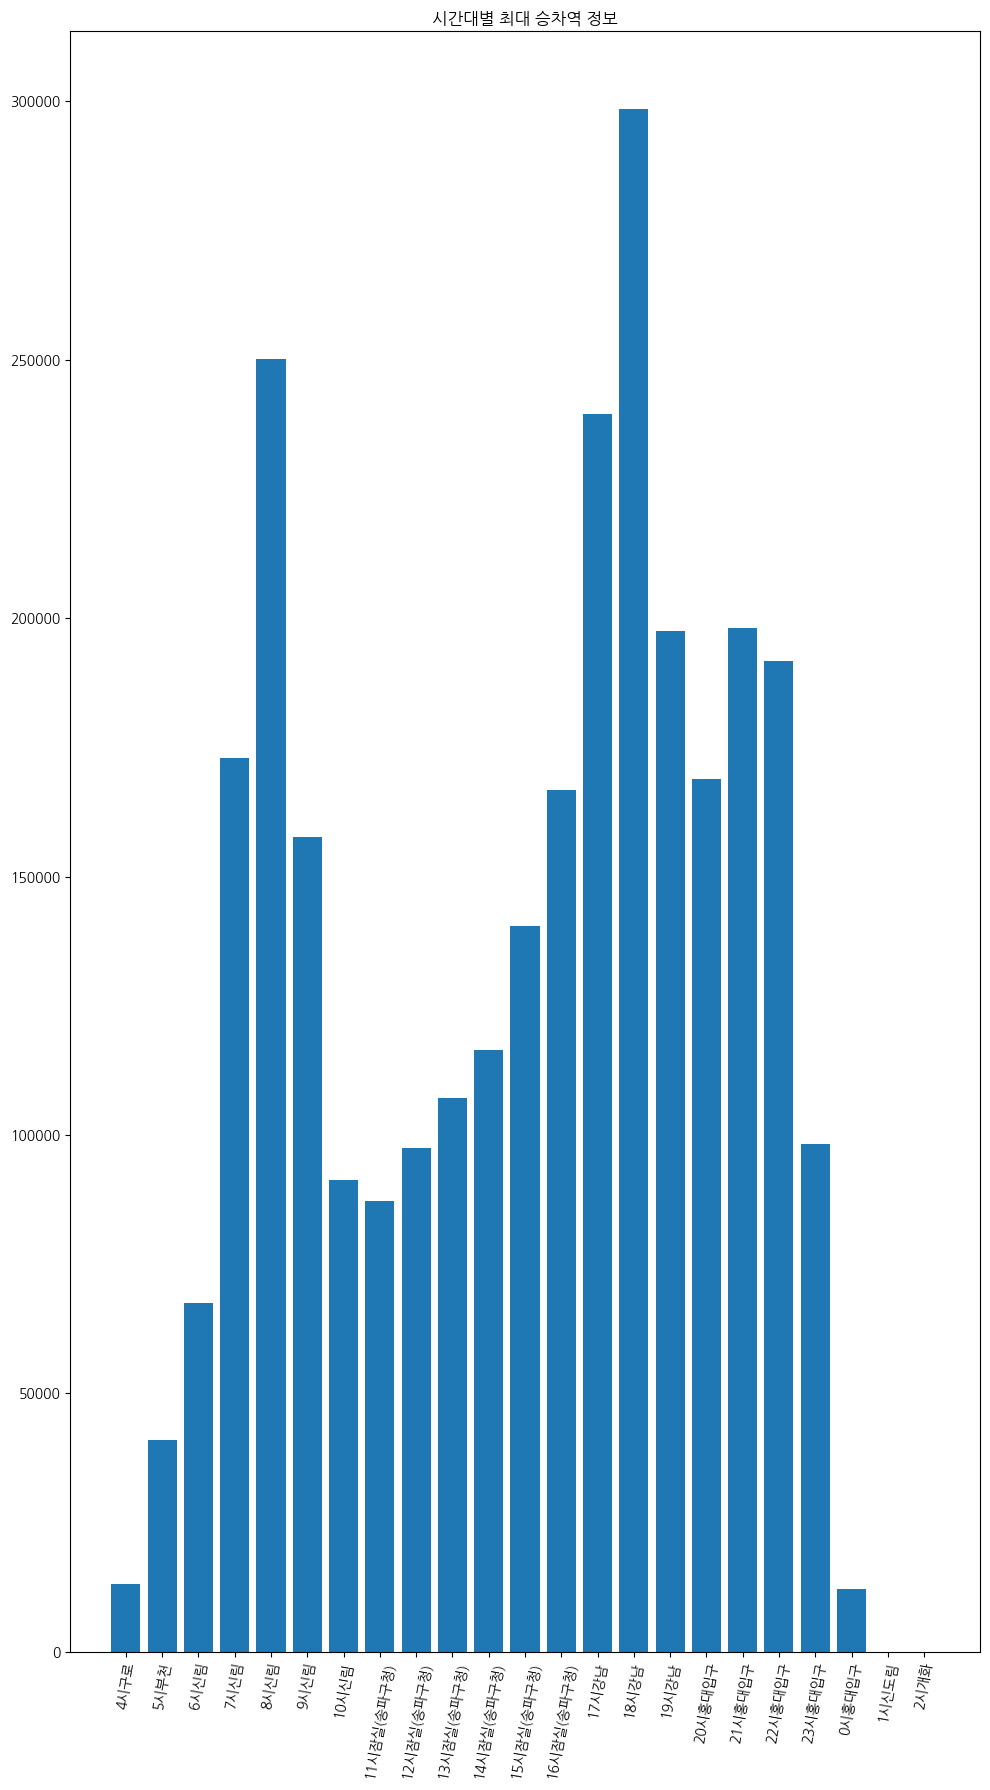

In [9]:
with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    max = [0] * 23
    max_station = [''] * 23
    xtick_list = []
    
    for i in range(4, 27):      # 시간표시?
        n = i % 24
        xtick_list.append(str(n))
        
    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j*2 +4]
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j]+'시'+row[3]
                
    for i in range(len(max)):
        print(f"[{max_station[i]}]: {max[i]}")
        
plt.figure(figsize=(10, 18))
plt.title("시간대별 최대 승차역 정보")
plt.bar(range(23), max)
plt.xticks(range(23), labels=max_station, rotation=80)
plt.tight_layout()
plt.show()

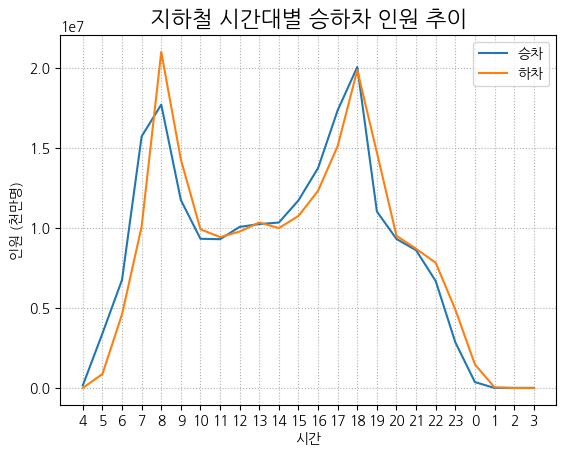

In [13]:
with open('../data/subwaytime.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    subway_in = [0] * 24
    subway_out = [0] * 24
    
    for row in data:
        row[4:] = map(int, row[4:])
        for i in range(24):
            subway_in[i] += row[4+i*2]
            subway_out[i] += row[5+i*2]
            
xtick_list = []
for i in range(4, 28):
    n = i % 24
    xtick_list.append(str(n))
    
plt.figure(dpi=100)
plt.title("지하철 시간대별 승하차 인원 추이", size=16)
plt.grid(linestyle=':')
plt.plot(subway_in, label='승차')
plt.plot(subway_out, label='하차')
plt.legend()

plt.xticks(np.arange(0, 24, 1), labels=xtick_list)
plt.xlabel('시간')
plt.ylabel('인원 (천만명)')
plt.show()